In [1]:
from libraries import lib
import qutip as qt
import torch.nn as nn 
import torch
import numpy as np
import matplotlib.pyplot as plt
from kan import *

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [3]:
f = lambda x: 1 + 2 * (x[:, [0]] - 2) ** 2
dataset = create_dataset(f, n_var=1, ranges = [-1, 5], device=device)

In [4]:
model = KAN(width = [1, 1], device = device)

checkpoint directory created: ./model
saving model version 0.0


In [5]:
model.fit(dataset, opt="LBFGS", steps=20);

| train_loss: 9.77e-07 | test_loss: 9.32e-07 | reg: 4.21e+00 | : 100%|█| 20/20 [00:00<00:00, 21.80it


saving model version 0.1


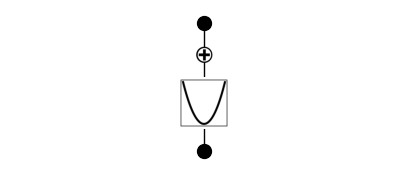

In [6]:
model.plot()

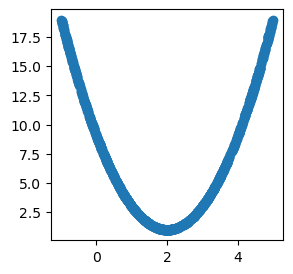

In [7]:
model.get_fun(0, 0, 0);

In [8]:
model.symbolic_formula()

([0], [x_1])

In [9]:
model.auto_symbolic()

fixing (0,0,0) with x^2, r2=1.0000003576278687, c=2
saving model version 0.2


In [10]:
model.fit(dataset, opt="LBFGS", steps=20);

| train_loss: 2.38e-06 | test_loss: 2.34e-06 | reg: 0.00e+00 | : 100%|█| 20/20 [00:00<00:00, 74.80it

saving model version 0.3


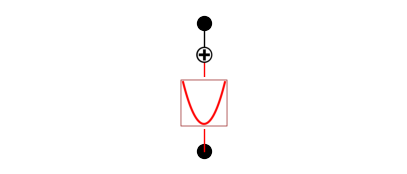

In [11]:
model.plot()

In [12]:
model.symbolic_formula()

([7.9999976153715*(1 - 0.5*x_1)**2 + 1.00000333786011], [x_1])

In [15]:
nsimplify(ex_round(model.symbolic_formula()[0][0], 2))

8*(1 - x_1/2)**2 + 1